## Import Statements

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def bootstrap(data, size = 1000):
    stat_list= []
    for i in range(size):
        new_sample = np.random.choice ( data, size= len(data) , replace= True)
        new_sample_mean = np.mean(new_sample)
        stat_list.append(new_sample_mean)
    return stat_list

In [3]:
small_sample = list(range(1,11))
small_sample

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

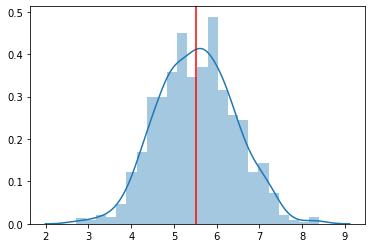

In [6]:
sampling_distribution_of_mean = bootstrap(small_sample)
mean_of_means = np.mean(sampling_distribution_of_mean)
ax = sns.distplot(sampling_distribution_of_mean)
ax.axvline(mean_of_means, color= 'r')
plt.show()

#  Load Data

In [8]:
data = load_breast_cancer()

In [9]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data.target;

positive >0 , negative = 0

In [14]:
df['label']= 1 -  data.target

In [17]:
df.label.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: label, dtype: float64

In [18]:
df.label.value_counts(normalize = True).max()*100

62.741652021089635

In [19]:
X = df.drop('label' ,axis = 1 )

In [20]:
y = df.label

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42 , stratify = y)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381,)
(188,)


In [28]:
y_train.mean()

0.37270341207349084

In [29]:
y_test.mean()

0.3723404255319149

## Decisoin Tree

In [30]:
dt = DecisionTreeClassifier()

In [35]:
scores = cross_val_score(dt, X_train, y_train, cv = 5)
scores

array([0.98701299, 0.90909091, 0.90789474, 0.89473684, 0.92      ])

In [36]:
scores.mean()

0.923747095010253

In [37]:
scores.std()

0.03263222220665504

In [38]:
scores.var()

0.0010648619261445103

In [39]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [40]:
dt.score(X_test, y_test)

0.898936170212766

# Bootstrap with Pandas

In [41]:
X_smaple = X_train.sample( n= len(X_train), replace= True, random_state= 42)

y_sample = y_train[X_smaple.index]

# Score on Descision Tree(DT) on Pandas Bootstrap Sample

In [42]:
bootstrapped_tree = DecisionTreeClassifier()
bootstrapped_tree.fit(X_smaple, y_sample)

bootstrapped_tree.score(X_test, y_test)

0.9308510638297872

## Bagging Classifier

In [43]:
bag = BaggingClassifier(n_estimators= 1000)
scores = cross_val_score(bag,X,y, cv= 5)
scores

array([0.90434783, 0.94782609, 0.99115044, 0.96460177, 0.99115044])

In [44]:
bag = BaggingClassifier(n_estimators=1000)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.9627659574468085

# Random Forest Classifier

max_feature

In [38]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9574468085106383

## Extra Classifier

In [39]:
et = ExtraTreesClassifier(n_estimators=1000)
et.fit(X_train, y_train)
et.score(X_test, y_test)

0.9627659574468085